In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [540]:
file_path = 'E:/UNCC/UNCC ML/Housing.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [541]:
# Converting the strings to values

list1 =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
list2 = ['furnishingstatus']

# Defining the map function
def map1(x):
    return x.map({'yes': 1, 'no': 0})

def map2(x):
    return x.map({'furnished': 1, 'semi-furnished': 0})
    
sample[list1] = sample[list1].apply(map1)
sample[list2] = sample[list2].apply(map2)

sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0


In [542]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Normalizing every values except 'price' which is output and parameters with binary values ('yes/no' and 'furnished/semi-furnished').
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

sample[num_vars] = scaler.fit_transform(sample[num_vars])
sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.0


In [543]:
sample1 = sample[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
sample1.head(3)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,0.396564,0.6,0.333333,0.666667,0.666667
1,12250000,0.502405,0.6,1.000000,1.000000,1.000000
2,12250000,0.571134,0.4,0.333333,0.333333,0.666667


In [544]:
from sklearn.model_selection import train_test_split

# Splitting the training and validation sets.
np.random.seed(0)
df_train, df_test = train_test_split(sample1, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train
y_val = df_test.pop('price')
X_test = df_test

In [545]:
# Creating the numpy arrays.
X_p1_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_p1_val = np.c_[np.ones((len(X_test), 1)), X_test]

y_p1_train = y_train.to_numpy()
y_p1_val = y_val.to_numpy()


train_losses = []
val_losses = []

In [546]:
# Setting the values for gradient desent calculation.
learning_rate = 0.1
iterations = 100
m = len(y_train)
n = len(y_val)
w = np.random.randn(X_p1_train.shape[1])

In [547]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f'The values of the weights: {w}')

The values of the weights: [2725600.14769283 2248882.79836679 1398832.60457979 1894370.11409412
 1701767.89216814 1467446.2528565 ]


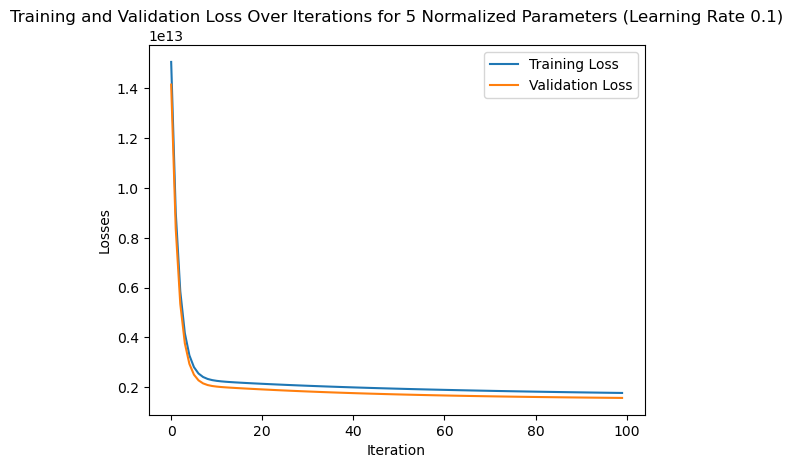

In [548]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 5 Normalized Parameters (Learning Rate 0.1)")
plt.show()

In [549]:
# Setting the values for gradient desent calculation.
learning_rate = 0.01
#iterations = 100
m = len(y_train)
n = len(y_val)
w = np.random.randn(X_p1_train.shape[1])

In [550]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f'The values of the weights: {w}')

The values of the weights: [3189560.41061098  996570.35037069 1343536.38421852  567498.32751889
 1134712.5899833  1000466.19407699]


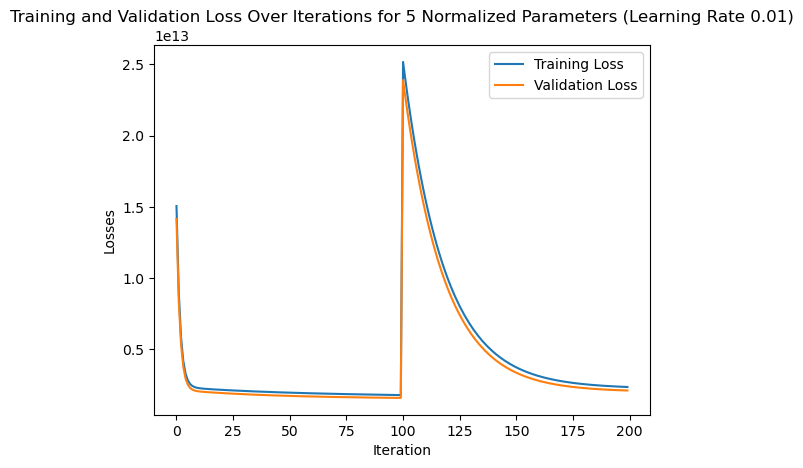

In [551]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 5 Normalized Parameters (Learning Rate 0.01)")
plt.show()

In [552]:
from sklearn.preprocessing import StandardScaler

# Normalizing every values except 'price' which is output and parameters with binary values ('yes/no' and 'furnished/semi-furnished').
scaler_s = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

sample[num_vars] = scaler_s.fit_transform(sample[num_vars])
sample.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1.0
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.0


In [553]:
sample2 = sample[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
sample2.head(3)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692


In [554]:
from sklearn.model_selection import train_test_split

# Splitting the training and validation sets.
np.random.seed(0)
df_train, df_test = train_test_split(sample2, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train
y_val = df_test.pop('price')
X_test = df_test

In [555]:
# Creating the numpy arrays.
X_p1_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_p1_val = np.c_[np.ones((len(X_test), 1)), X_test]

y_p1_train = y_train.to_numpy()
y_p1_val = y_val.to_numpy()


train_losses = []
val_losses = []

In [556]:
# Setting the values for gradient desent calculation.
learning_rate = 0.1
# iterations = 100
m = len(y_train)
n = len(y_val)
w = np.random.randn(X_p1_train.shape[1])

In [557]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f'The values of the weights: {w}')

The values of the weights: [4773808.19013385  736561.70256045   80271.036745    640887.6606862
  456137.0170859   287091.47064691]


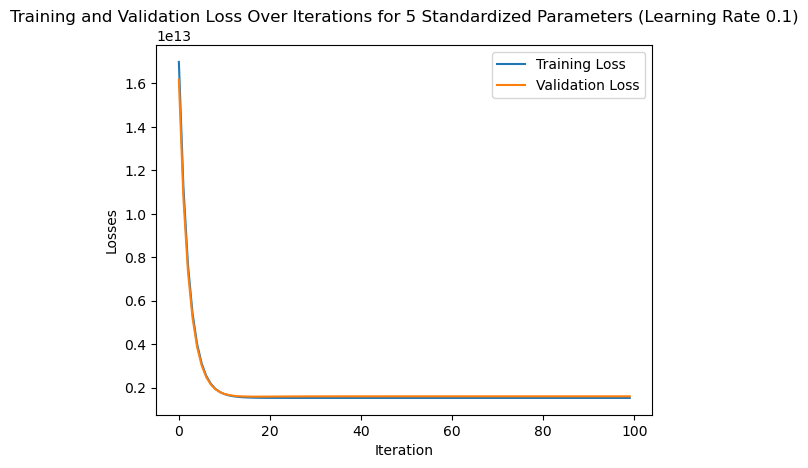

In [558]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 5 Standardized Parameters (Learning Rate 0.1)")
plt.show()

In [559]:
# Setting the values for gradient desent calculation.
learning_rate = 0.01
# iterations = 100
m = len(y_train)
n = len(y_val)
w = np.random.randn(X_p1_train.shape[1])

In [560]:
# The calculation loop for weights and losses
for i in range(iterations):
    gradient = (2/m) * X_p1_train.T.dot(X_p1_train.dot(w) - y_p1_train)

    w -= learning_rate * gradient

    train_loss = (1/m) * np.sum(np.square(X_p1_train.dot(w) - y_p1_train))
    val_loss = (1/n) * np.sum(np.square(X_p1_val.dot(w) - y_p1_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
print(f'The values of the weights: {w}')

The values of the weights: [4140904.54573278  632281.84623945  113478.32581009  598915.22774475
  449149.35675562  380475.31632871]


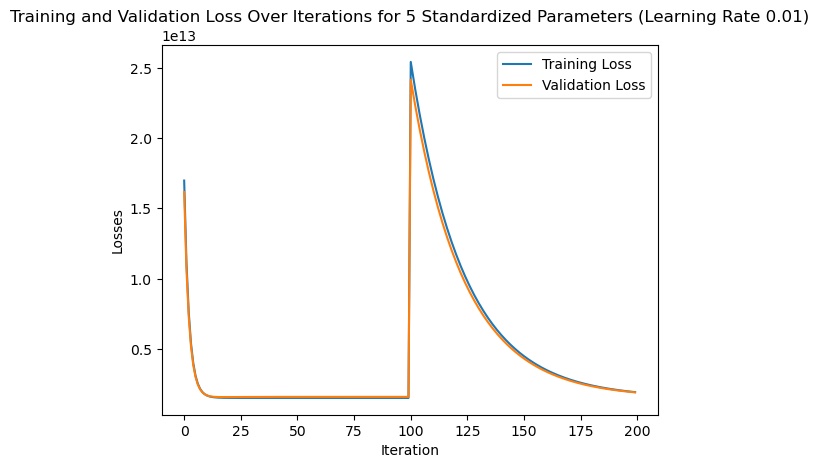

In [561]:
# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for 5 Standardized Parameters (Learning Rate 0.01)")
plt.show()